# The Data Wars: Code Clash in the Galactic Empire

## Act 2: The Hoth Project Hurdle

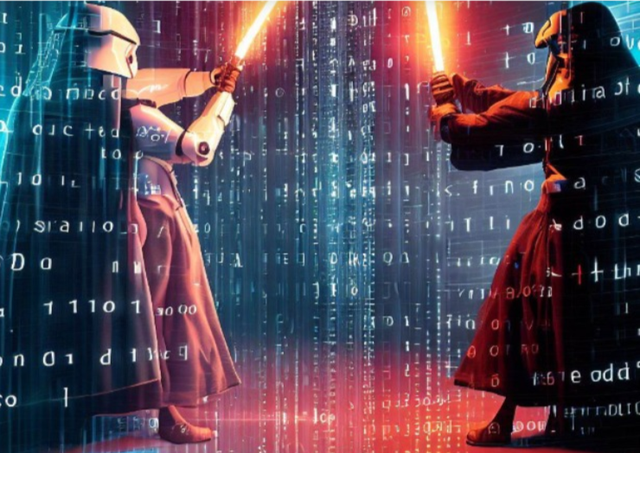

### Reviewing of the two sides in the data wars

According to the Data Wars conspect, we have:

#### Luke CodeWalker (Data scientist):
A daring Data Scientist committed to the Rebel Alliance, eager to explore, analyze, and understand the data to find strategic insights.

#### Darth Validator (Data owner): 
A vigilant Data Owner from the Galactic Empire, responsible for reviewing and approving code requests, ensuring no sensitive data leaks from the Empire's vaults.


## The Setup Phase

For a data war to happen... there must be data!

And even more than that: the data must be guarded properly behind the walls of the Darth Validator to minimise any privacy or data leaks and retain ownership of the data, but also accesible to Luke CodeWalker for him to fulfill his purpose of learning relevant information from the datasets, without having direct access to it.

Thus, let's see how the Galactic Empire has decided this should happen.

### Real data and mock data

How it works is that there will be two datasets:
- the real dataset, containing the true unaltered information
- a mock dataset, containing fake data generated to be of the same type to the real one

### High-side domain and low-side domain

The real dataset will be kept private in what is called **the high side domain**. Only the data manager have direct access to it, and not data scientists.

The mock dataset will be stored into the **low side domain** and you will have direct access to it via code request.
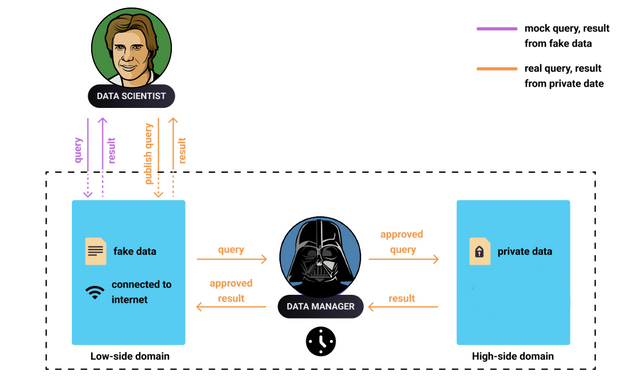


### Workflow altogether

Let's assume you are Luke CodeWalker and you would like to investigate the data hosted by Darth Validator.

**Prepare the query** (purple arrows)\
Luke knows what he would like to learn from Darth Validator's data, so he can prepare a code request, but will only be able to run it against the mock dataset on the low-side domain. The dataset will look and feel like the real one, but it won't contain the true data, thus useful for testing.

**Submit the code request** (orange arrows)\
Luke can submit the code query for approval from Darth Validator. The code is sent via PySyft API directly to the him, the data manager, who will check the code, make sure it is safe to be run on the private, highly secured data, and if so, Darth Validator will execute the code on the private data, and generate the answer.

**Get the answer** (orange arrows)\
After Darth Validator runs the code, he will also inspect the answer to make sure privacy is preserved before sharing it with his biggest enemy, Luke CodeWalker. If it is fine, Darth will send the unaltered answer which the function returned on the private, real data this time.


The setup will therefore consist of:
- prepare the low-side server
- generate and upload the data to the servers (real & mock)
- give access to the data scientist to the low-side
- check that we are ready

All you need to do is run through the following code cells without any change and checking that it worked, as the whole Galactic Empire (and the following steps) depend on it.

#### Please make sure you are running 3.9+. Galactic Empire does not accept less.

In [ ]:
!pip install --pre syft

In [1]:
# Imports

import syft as sy
from syft import autocache
import pandas as pd
import numpy as np

In [2]:
# Step 1. Launching the low-side

low_side_server = sy.orchestra.launch(name="galactic_empire", dev_mode=True, reset=True)

SQLite Store Path:
!open file:///tmp/d53bb40d0ba04b09a07035d5ab677a61.sqlite



In [11]:
# Step 2. Get a client to access the Galactic Empire Domain as a data manager 

low_side_client_darth_validator = low_side_server.login(email="info@openmined.org", password="changethis")
low_side_client_darth_validator

<SyftClient - galactic_empire <d53bb40d0ba04b09a07035d5ab677a61>: PythonConnection>

In [4]:
# Step 3. Dataset loading

# As we do not have such a dataset, we generate it from scratch.

def generate_space_battles(num_battles, seed=42):
    # Set a seed for reproducibility
    np.random.seed(seed)

    # Generate random data for each column
    battle_id = np.arange(1, num_battles + 1)
    year = np.random.randint(20, 40, size=num_battles)  # Assuming the battles took place between year 20 and 40
    duration = np.random.uniform(1, 72, size=num_battles)  # Duration between 1 and 72 hours
    galactic_lat = np.random.uniform(-90, 90, size=num_battles)  # Galactic Latitude between -90 and 90
    galactic_long = np.random.uniform(-180, 180, size=num_battles)  # Galactic Longitude between -180 and 180
    rebel_forces = np.random.randint(1, 10000, size=num_battles)  # Number of Rebel ships involved
    empire_forces = np.random.randint(1, 10000, size=num_battles)  # Number of Empire ships involved
    rebel_casualties = np.random.randint(0, rebel_forces)  # Rebel casualties cannot exceed number of Rebel forces
    empire_casualties = np.random.randint(0, empire_forces)  # Empire casualties cannot exceed number of Empire forces
    outcome = np.random.randint(0, 2, size=num_battles)  # Outcome is either 0 (Empire won) or 1 (Rebels won)

    # Combine all columns into a DataFrame
    df = pd.DataFrame({
        'Battle ID': battle_id,
        'Year': year,
        'Duration': duration,
        'Galactic Latitude': galactic_lat,
        'Galactic Longitude': galactic_long,
        'Rebel Forces': rebel_forces,
        'Empire Forces': empire_forces,
        'Rebel Casualties': rebel_casualties,
        'Empire Casualties': empire_casualties,
        'Outcome': outcome
    })

    return df

private_data = generate_space_battles(1000)
mock_data = generate_space_battles(1000)

In [7]:
# Step 4. Upload the dataset to the low-side server

battle_dataset = sy.Dataset(
    name="Data wars battle dataset",
    description="""Contains the data of all the spacewars fought""",
    assets_list=[
        sy.Asset(
            name="battles",
            description="""Contains the details for all the battles fought in space""",
            data=private_data,
            mock=mock_data
        ),
    ],
)
battle_dataset.add_contributor(
    role=sy.roles.UPLOADER, 
    name="Darth SkyWalker", 
    email="darth@skywalker.com",
    note="Darth Walker makes everything happen in space")

low_side_client_darth_validator.upload_dataset(battle_dataset)

0it [00:00, ?it/s]


<class 'syft.service.response.SyftSuccess'>: Dataset Added

In [8]:
# Step 5. Create an account for Luke CodeWalker to access the low-side domain

low_side_client_darth_validator.register(
    name="Luke CodeWalker",
    email="luke@galactic-empire.edu",
    password="codewalker")

<class 'syft.service.response.SyftSuccess'>: User successfully registered!

In [10]:
# Step 6. Get a client to access the Galactic Empire Low-side Domain as a data scientst

low_side_client_luke_codewalker = low_side_server.login(email="luke@galactic-empire.edu", password="codewalker")
low_side_client_luke_codewalker

/home/ina/miniconda3/lib/python3.9/site-packages/IPython/core/formatters.py:365: FormatterWarning: text/html formatter returned invalid type <class 'type'> (expected <class 'str'>) for object: <SyftClient - galactic_empire <d53bb40d0ba04b09a07035d5ab677a61>: PythonConnection>
  warnings.warn(


<SyftClient - galactic_empire <d53bb40d0ba04b09a07035d5ab677a61>: PythonConnection>

### NOTES

For easiness, we compiled the whole act in one notebook, which means you will switch hats often - from being Luke CodeWalker to being Darth Validator and back, to cover each part of the workflow. Make sure that when you refer to the domain as Luke - you use `low_side_client_luke_codewalker` and when you refer to the domain as Darth (data manager) - you use `low_side_client_darth_validator`.

## Into the Adventure

Once the setup phase is complete, you are free to follow replicating the act that has been assigned to you.

We'll guide your way, but refering to documentation will be necessary often to figure out how to succed.

Remember, your role in this saga is crucial; the Empire and Rebel Alliance both rely on your acumen and skills. So gear up, ignite your lightsaber, and step into the world of Syft, where data security and privacy matter as much as the force itself.

May the Force (of Syft) be with you!

# Act 2 - The Hoth Project Hurdle

## Scene 1: 

As Luke CodeWalker, eager to push boundaries, you start Project Hoth. You send one code request for this new project to Darth Validator. This might involve identifying the battle with the highest number of rebel forces.

Using Syft, you need to create this code request on the dataset called `Data wars battle dataset`.

Let's get to it.

### Step 1.1:  Luke CodeWalker finds dataset 

In [ ]:
# Inspect what datasets are hosted in the domain

Fill in the code here

In [ ]:
# Inspect what assets are hosted under the dataset named 'Data wars battle dataset'

Fill in the code here

In [ ]:
# Inspect each asset 

Fill in the code here

### Step 1.2: Luke CodeWalker test the code against mock data

In [ ]:
# Uncomment the code below to define the methods requested for testing
 
# def max_rebel_forces(battle_data):
#     # DO NOT CHANGE
    
#     import pandas as pd
#     from opendp.mod import enable_features
#     enable_features('contrib')
#     from opendp.measurements import make_base_laplace
    
#     battle_max_forces = battle_data[battle_data['Rebel Forces'] == battle_data['Rebel Forces'].max()]['Battle Name']

#     temp_data = battle_data.copy()  
#     mean_forces = temp_data['Rebel Forces'].mean()

#     result = {'data': temp_data, 'statistic': mean_forces}

#     return result


In [ ]:
# Test the first method against the mock data on the domain

Fill in the code here

In [ ]:
# Test the second method against the mock data on the domain

Fill in the code here

### Step 1.3: Luke CodeWalker creates the code request

Darth Validator is taking extra steps dealing with Luke\'s requests, who is a known Jedi Knight. Thus, he will only accept remote code execution that:
- can only be run once on the private data
- can only be run only on the specified dataset
- can only be run without any modification to the code sent

Let's see how we transform the Python methods define above to be compliant with Darth Validator's strict requirements.

In [ ]:
# Re-define first method to be compliant with the requests above.

Fill in the code here

In [ ]:
# Re-define the second method to be compliant with the requests above.

Fill in the code here

### Step 1.4: Luke creates the project 'Hoth'

The project Hoth aims to unveil the major battles where Rebel forces exhibited their true strength. In this project, we seek to identify.    the battle which saw the highest number of Rebel forces in action.

In [ ]:
# Create a project named 'Hoth'

Fill in the code here

In [ ]:
# Check the project looks alright

Fill in the code here

In [ ]:
# Add the methods defined before as code requests on the project

Fill in the code here

In [ ]:
# Check the requests were registered on the project

Fill in the code here

In [ ]:
# Inspect the code has succesfully reached the domain

Fill in the code here

### Step 1.5: Luke checks if his request got answered


In [ ]:
# Checks the status of requests

Fill in the code here

## Scene 2: 

Darth Validator is back and a new threat has appeared: incoming code requests from none other than Luke CodeWalker. 

As Darth Validator, you carefully review the code requests, but make sure that the computations are not revealing any sensitive data, but statistical relevant information.

In this case, Luke is playing tricks on you - trying to extract the whole dataset from you, but you figure out and refuse the request.

### Step 2.1: Darth Validator check for projects submitted to his domain


In [ ]:
# Inspect projects on the domain

Fill in the code here

In [ ]:
# Inspect if there are pending requests attached to the project

Fill in the code here

### Step 2.2: Darth Validator denies malicious request

In [ ]:
# Get the pending request

Fill in the code here

In [ ]:
# Check the code under request without running it

Fill in the code here

In [ ]:
# Retrieve the callable function for running and run it on mock data

Fill in the code here

In [ ]:
# Run the callable function on the private data

Fill in the code here

In [ ]:
# Deny the request, as it attempts to return the entire dataset.
# What a trick Luke thought of! 

Fill in the code here

### Step 2.3: Confirm no pending project requests

In [ ]:
# Check the status of all requests under the project

Fill in the code here

## Scene 3: 


As Luke CodeWalker, you receive the refusal from Darth Validator. You lost one battle, but not the whole war. 

Let's submit a new code request without any tricks.


### Step 3.1: Luke checks status of requests

In [ ]:
# Luke CodeWalker checks the response for request

Fill in the code here

### Step 3.2: Luke writes a new method

In [ ]:
# Uncomment the code below to define the methods requested for testing


# # Notice the _v2 to signal it is a new method definition
# def max_rebel_forces_v2(battle_data):
#     # DO NOT CHANGE
#     import pandas as pd
    
#     battle_max_forces = battle_data[battle_data['Rebel Forces'] == battle_data['Rebel Forces'].max()]['Battle Name']
    
#     return battle_max_forces

In [ ]:
# Test the method against the mock data on the domain

Fill in the code here

### Step 3.3: Luke submits a new code request to project 'Hoth'

In [ ]:
# Re-define the method to be syft executable

Fill in the code here

In [ ]:
# Add the code request to the project 'Hoth'

Fill in the code here

In [ ]:
# Check the code request is pending an answer

Fill in the code here

## Scene 4: 


As Darth Validator, you inspect the domain again for incoming request on your projects and you note Luke CodeWalker took note of your refusal and submitted an improved request.

In good faith, you approve and respond.

In [ ]:
# Check the status of request on project 'Hoth'

Fill in the code here

In [ ]:
# Get the pending request

Fill in the code here

In [ ]:
# Check the code under request without running it

Fill in the code here

In [ ]:
# Retrieve the callable function for running and run it on mock data

Fill in the code here

In [ ]:
# Run the callable function on the private data

Fill in the code here

In [ ]:
# Approve by returning result to the new method. 

Fill in the code here

# Success! 